### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

In [90]:
df = pd.read_csv('data/telco_churn_data.csv')

In [91]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [93]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


### Preparing and cleaning up data 

In [94]:
#Identify and create a list of object columns : 
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print(object_cols)



['Customer ID', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'City', 'Churn Category', 'Churn Reason']


In [95]:
#Identify and create a list of non-object based columns in data:
numeric_cols = df.select_dtypes(exclude=['object']).columns.tolist()
print(numeric_cols)

['Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Regular Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Churn Value', 'CLTV', 'Total Customer Svc Requests', 'Product/Service Issues Reported', 'Customer Satisfaction']


In [96]:
#Create a data frame excluding all object columns for first phase PCA analysis of numerical data
df_numeric = df.drop(object_cols, axis = 1)

#Spot check new df created with numerical data 
print(df_numeric.shape)
df_numeric.info()

(7043, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Download            7043 non-null   int64  
 4   Monthly Charge                     7043 non-null   float64
 5   Total Regular Charges              7043 non-null   float64
 6   Total Refunds                      7043 non-null   float64
 7   Total Extra Data Charges           7043 non-null   float64
 8   Total Long Distance Charges        7043 non-null   float64
 9   Age                                7043 non-null   int64  
 10  Number of Dependents               7043 non-null   int64  
 11  Zip Code                           7043 non-n

In [97]:
# Identify % of data that has null values and consider dropping column or alternative method to clean given data:
#  - Customer Satisifaction has ~ 73% of data as null so drop this column 
df_numeric.isnull().mean()*100



Number of Referrals                   0.00000
Tenure in Months                      0.00000
Avg Monthly Long Distance Charges     0.00000
Avg Monthly GB Download               0.00000
Monthly Charge                        0.00000
Total Regular Charges                 0.00000
Total Refunds                         0.00000
Total Extra Data Charges              0.00000
Total Long Distance Charges           0.00000
Age                                   0.00000
Number of Dependents                  0.00000
Zip Code                              0.00000
Latitude                              0.00000
Longitude                             0.00000
Population                            0.00000
Churn Value                           0.00000
CLTV                                  0.00000
Total Customer Svc Requests           0.00000
Product/Service Issues Reported       0.00000
Customer Satisfaction                73.95996
dtype: float64

In [98]:
# Identify unique values to get a sense of the sample data and values
col_features = df_numeric.columns.values.tolist() 
for item in col_features: 
    #print(item)
    #Format printing as you would like for future arra list output as feature: array list 
    #print(data[item].unique())
    print('{0} \t {1} \n'.format(item, df_numeric[item].unique()))

Number of Referrals 	 [ 0  1  6  2  4  3  7  5  8  9 10 11] 

Tenure in Months 	 [ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63] 

Avg Monthly Long Distance Charges 	 [ 0.   48.85 11.33 ... 44.99 44.98  8.62] 

Avg Monthly GB Download 	 [ 9 19 57 13 15 20 33 26 21 32 31 12 10  8 16  2 11  6 14  0 30 29 24 28
 23 22  7 18 25  4  3  5 27 58 17 53 75 56 52 76 64 45 63 62 78 80 84 65
 90 46 43 94 51 48 73 69 71 42 41 59 47 82 85] 

Monthly Charge 	 [41.236 83.876 99.268 ... 72.    65.45  78.7  ] 

Total Regular Charges 	 [  39.65  633.3  1752.55 ... 7362.9   346.45 6844.5 ] 

Total Refunds 	 [ 0.   45.61 13.43 40.95 11.05 29.84 49.57 12.07 40.64 10.2  17.88 37.55
 48.09 32.46 20.23 12.59 43.31  8.13 46.64 23.33 47.2  33.25 33.73 49.06
 25.79 15.24 26.99 44.58 20.16  8.88 12.48  6.79 39.29 44.31  5.49 25.67
  9.49 29.17 1

In [99]:
#Take a look at object data for unique values as well 
for item in object_cols: 
    #print(item)
    #Format printing as you would like for future arra list output as feature: array list 
    #print(data[item].unique())
    print('{0} \t {1} \n'.format(item, df[item].unique()))

Customer ID 	 ['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK'] 

Referred a Friend 	 ['No' 'Yes'] 

Offer 	 [nan 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A'] 

Phone Service 	 ['No' 'Yes'] 

Multiple Lines 	 ['No' 'Yes'] 

Internet Service 	 ['Yes' 'No'] 

Internet Type 	 ['Fiber Optic' 'Cable' 'DSL' nan] 

Online Security 	 ['No' 'Yes'] 

Online Backup 	 ['No' 'Yes'] 

Device Protection Plan 	 ['Yes' 'No'] 

Premium Tech Support 	 ['No' 'Yes'] 

Streaming TV 	 ['No' 'Yes'] 

Streaming Movies 	 ['Yes' 'No'] 

Streaming Music 	 ['No' 'Yes'] 

Unlimited Data 	 ['No' 'Yes'] 

Contract 	 ['Month-to-Month' 'One Year' 'Two Year'] 

Paperless Billing 	 ['Yes' 'No'] 

Payment Method 	 ['Bank Withdrawal' 'Credit Card' 'Mailed Check'] 

Gender 	 ['Male' 'Female'] 

Under 30 	 ['No' 'Yes'] 

Senior Citizen 	 ['Yes' 'No'] 

Married 	 ['No' 'Yes'] 

Dependents 	 ['No' 'Yes'] 

City 	 ['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville'] 


#### Drop Columns from Numeric df 

Drop the following columns: 
- customer_id as this is simply the unique identifier and we don't require this for to execute PCA on data set
- customer_satisifactoin column as it has high % rate of NA - likely due to it not being a required filed for data entry 
- Zip Code, Latitude, Longitude are numerical values that are in essence Qualitative values or categorical values - drop them as well for PCA first pass attempt 

In [100]:
df_clean_nona = ''

object_cols = df.select_dtypes('object').columns.tolist() + ['Customer Satisfaction', 'Zip Code', 'Latitude', 'Longitude']
df_clean = df.drop(object_cols, axis = 1)

df_clean_nona = df_clean.dropna()

#Check resulting df
df_clean_nona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Download            7043 non-null   int64  
 4   Monthly Charge                     7043 non-null   float64
 5   Total Regular Charges              7043 non-null   float64
 6   Total Refunds                      7043 non-null   float64
 7   Total Extra Data Charges           7043 non-null   float64
 8   Total Long Distance Charges        7043 non-null   float64
 9   Age                                7043 non-null   int64  
 10  Number of Dependents               7043 non-null   int64  
 11  Population                         7043 non-null   int64

### Scaling Data (preparing for PCA)

In [101]:
df_scaled = ''

# Normalize data : (X-Xmean / Xstd )
df_scaled = (df_clean_nona - df_clean_nona.mean())/df_clean_nona.std()

#Check df scaled info / spot check: 
print(df_scaled.shape)
print(type(df_scaled))

(7043, 16)
<class 'pandas.core.frame.DataFrame'>


#### PCA 
- Leveragethe `PCA` transformer from scikitlearn to transform your data and select the top three principal components.  
- Create an instance of the `PCA` that limits the number of components to 3 using the `n_components` argument.  
- set the argument `random_state = 42`  and assign your instance as `pca` variable 


In [102]:
pca = ''

pca = PCA(n_components=3, random_state=42)

print(pca)
print(pca.n_components)

PCA(n_components=3, random_state=42)
3


#### Build a Scree Plot - assess ideal component # 
- Use the Shree Plot to identify the elbow for ideal component # to reduce to for modeling 
- Use the Cumulative Variance Explained to map the % variation for each component to make a decision clearer
- Use an 80% cumulative variance explained level for first iterstion of PCA components to leverage 

In [103]:
components = ''

### BEGIN SOLUTION
pca = PCA(n_components=16, random_state = 42)
components = pca.fit_transform(df_scaled)
### END SOLUTION

# Answer check
print(type(components))
print(components.shape)

<class 'numpy.ndarray'>
(7043, 16)


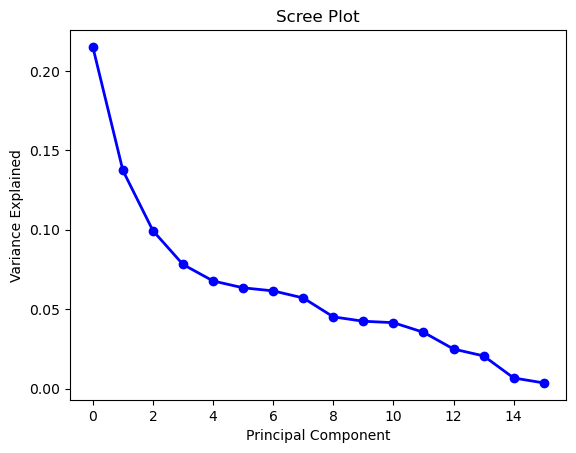

In [104]:
PC_Values = ''

PC_values = np.arange(pca.n_components_)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

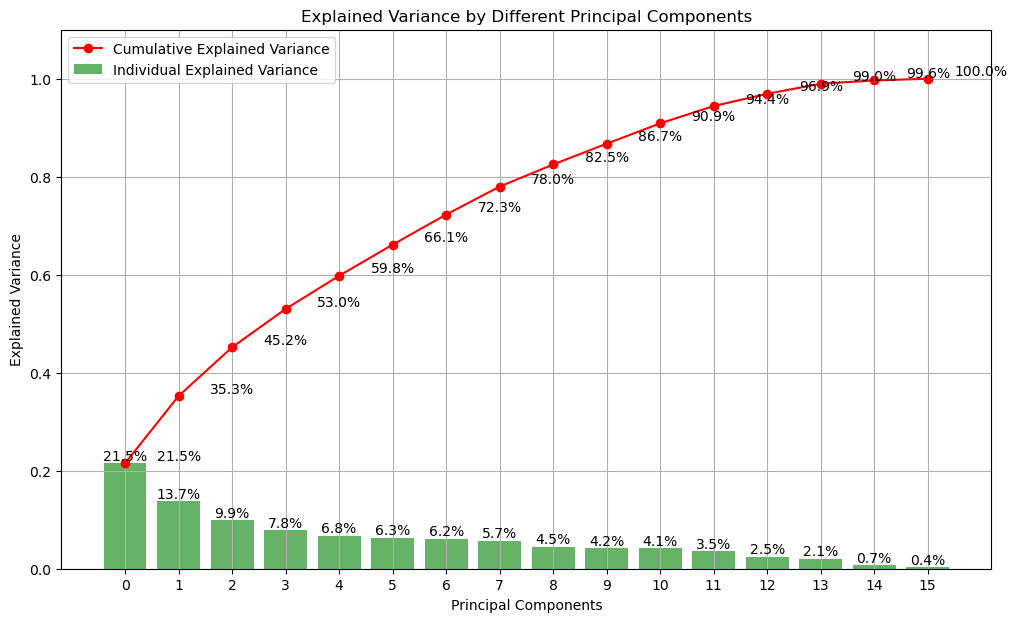

In [105]:
# Create the bar plot for individual variances
# Reference Medium Blog Article for code reuse for problem: https://medium.com/@megha.natarajan/understanding-cumulative-explained-variance-in-pca-with-python-653e3592a77c

cumulitive_variance_explained = ''

cumulitive_variance_explained = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 7))
bar = plt.bar(range(0, 16), pca.explained_variance_ratio_, alpha=0.6, color='g', label='Individual Explained Variance')

# Create the line plot for cumulative variance
line = plt.plot(cumulitive_variance_explained, marker='o', linestyle='-', color='r', 
                label='Cumulative Explained Variance')

# Adding percentage values on top of bars and dots
for i, (bar, cum_val) in enumerate(zip(bar, cumulitive_variance_explained)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pca.explained_variance_ratio_[i]*100:.1f}%', 
             ha='center', va='bottom')
    plt.text(i+1, cum_val, f'{cum_val*100:.1f}%', ha='center', va='bottom')

# Aesthetics for the plot
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.xticks(range(0, 16))
plt.legend(loc='upper left')
plt.ylim(0, 1.1)  # extend y-axis limit to accommodate text labels
plt.grid(True)
plt.show()

### Visualize initial assessment of 2 & 3 components
- Use the 2D component analysis to look at 2 components
- Use the 3D component anlaysis to look at 3 components 
